# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [67]:
%pip install numpy pandas matplotlib scipy seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

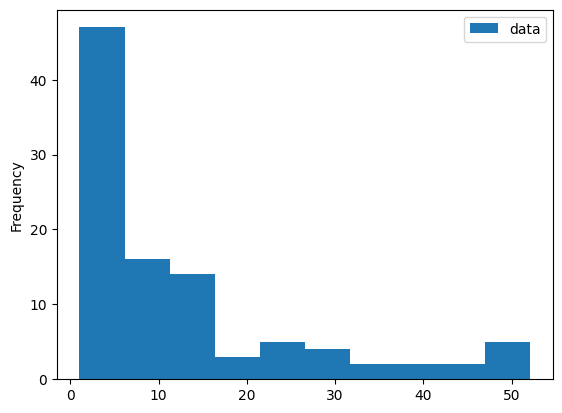

In [68]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

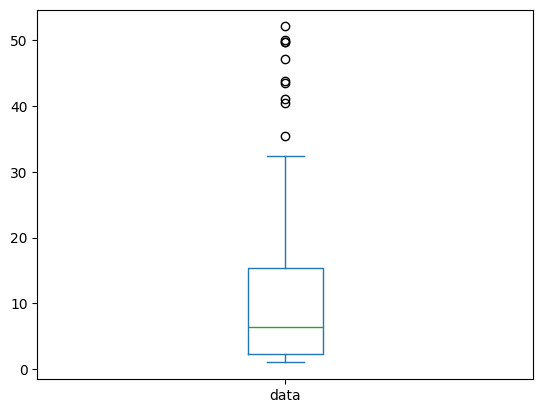

In [69]:
df.plot.box()

In [70]:
# Respectively, the histogram and boxplot each provides different insight into the drug price data.  The histogram shows the overall distribution and clearly reveals the strong right skew, with most drugs priced low and small number priced much higher (high wobble).  Its strength is showing distribution shape and frequency, but it depends on bin selection and does not directly display summary statistics.  The boxplot, on the other hand, provides a clear summary of the median, interquartile range (IQR), and outliers.  It quickly highlights how extreme the most expensive drugs are compared to the typical price range.  However, it does not show the detailed distribution shape.  With that has been stated, because the administrator wants to understand how expensive the higher priced drugs are relative to the rest, I would chose the boxplot.  To improve clarity, I would add clear axis labels with currency units, include descriptive title, and annotate key values such as median, or 75th percentile.   

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  100 non-null    int64  
 1   bmi                  100 non-null    float64
 2   blood_pressure       100 non-null    int64  
 3   cholesterol          100 non-null    int64  
 4   diabetes_risk_score  100 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


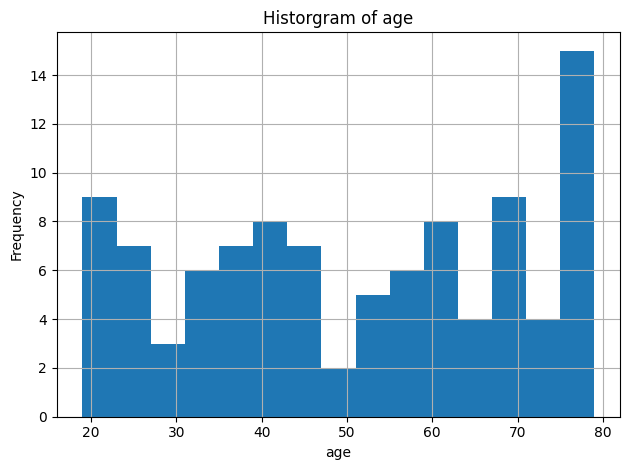

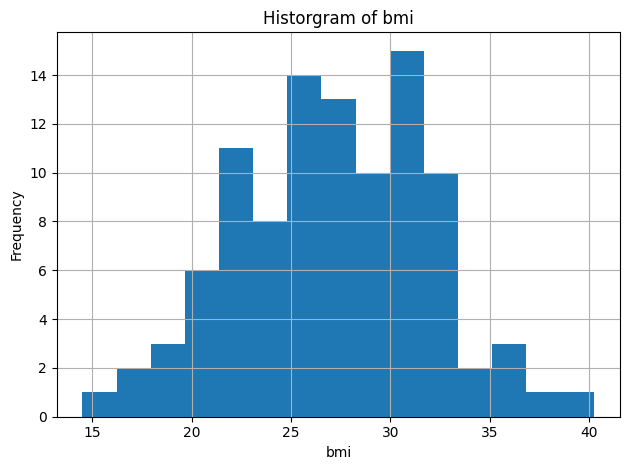

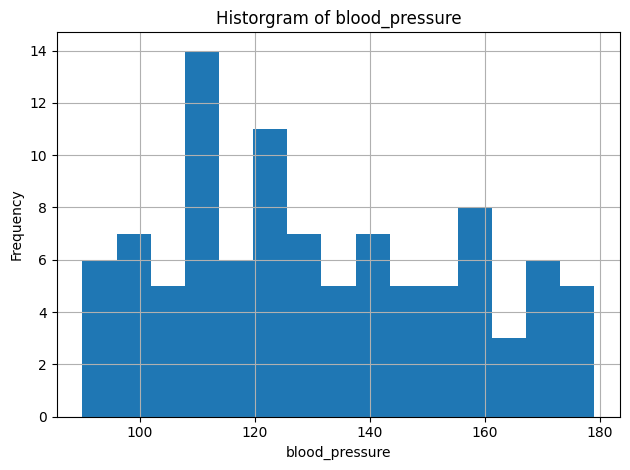

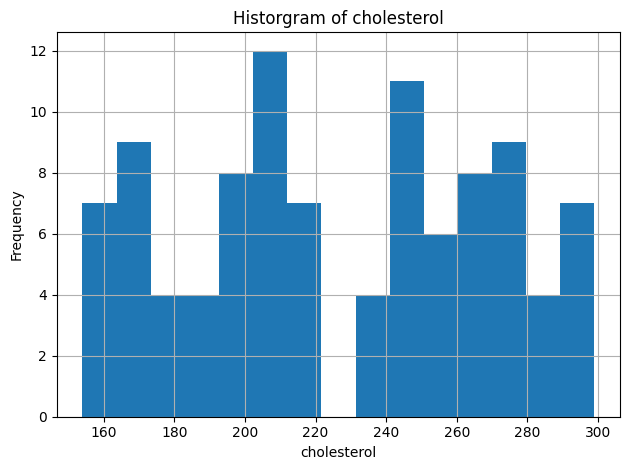

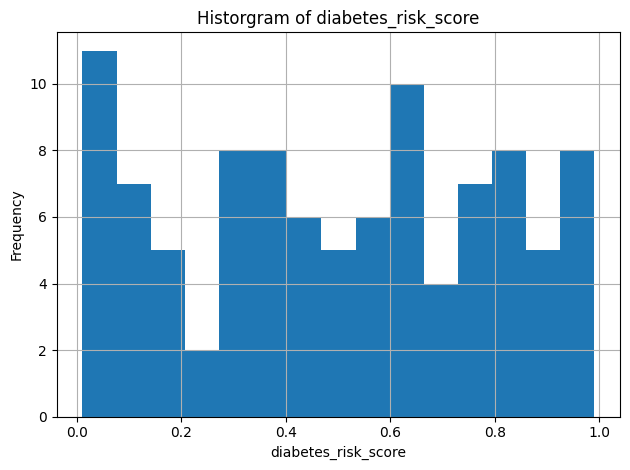

In [71]:
df = pd.read_csv("/workspaces/Module-B-semester-2/health_dataset.csv")
df.head()
df.info()
df.describe()

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=15)
    plt.title(f"Historgram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

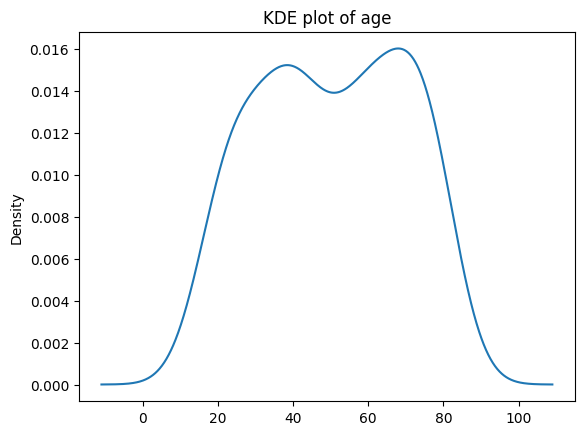

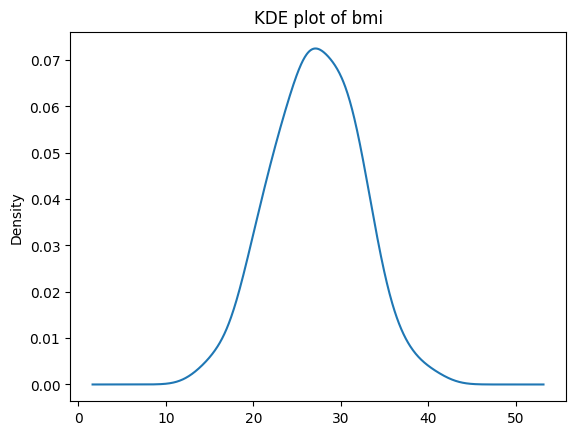

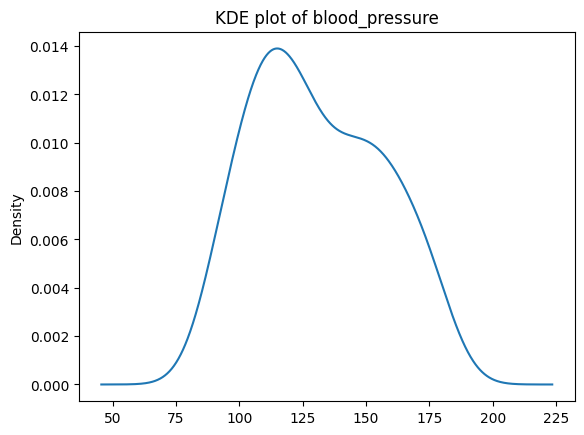

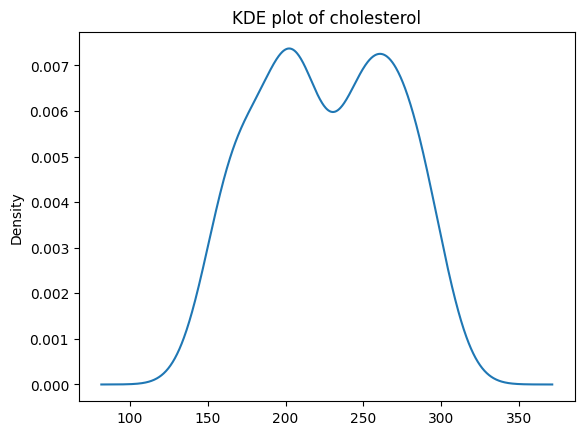

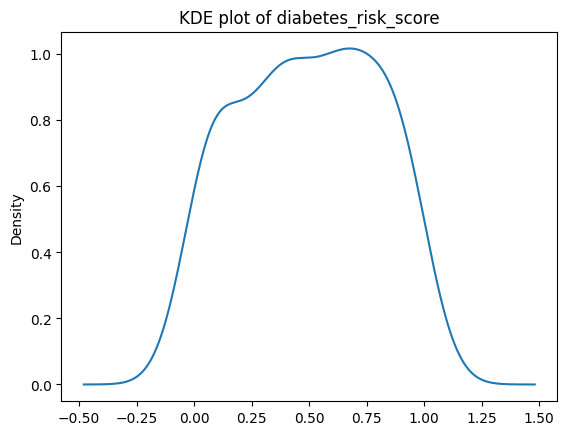

In [72]:

for col in numeric_cols:
    plt.Figure()
    df[col].plot(kind="kde")
    plt.title(f"KDE plot of {col}")
    plt.show()

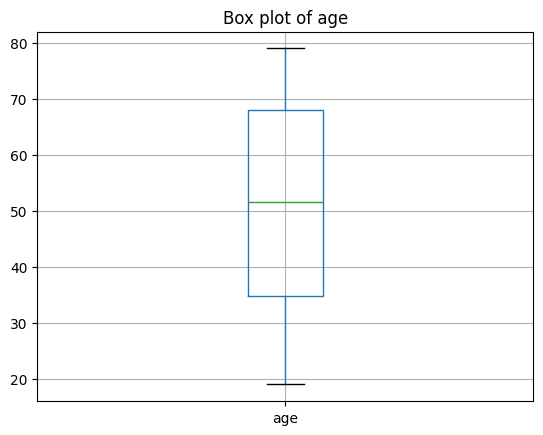

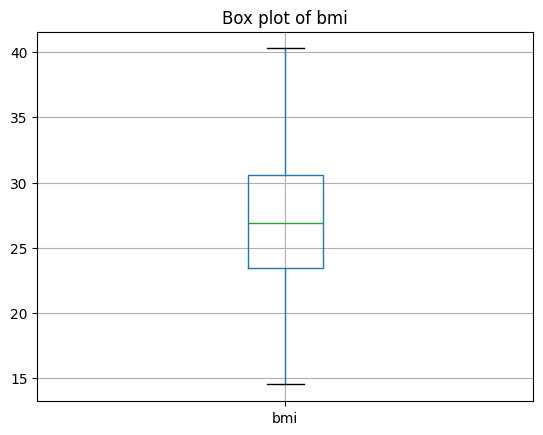

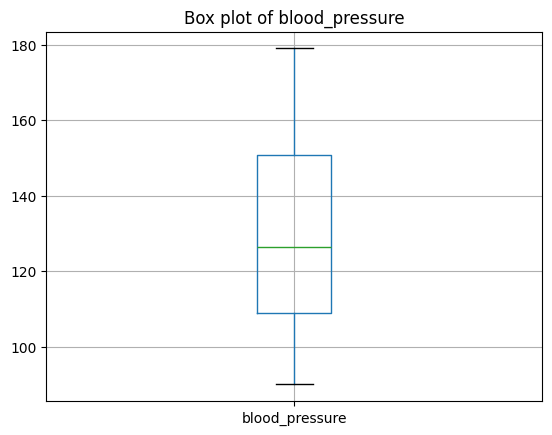

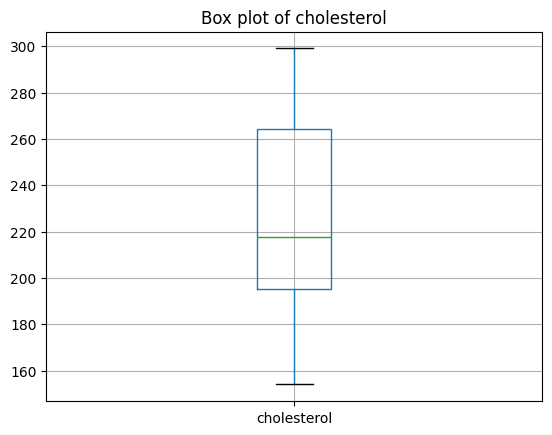

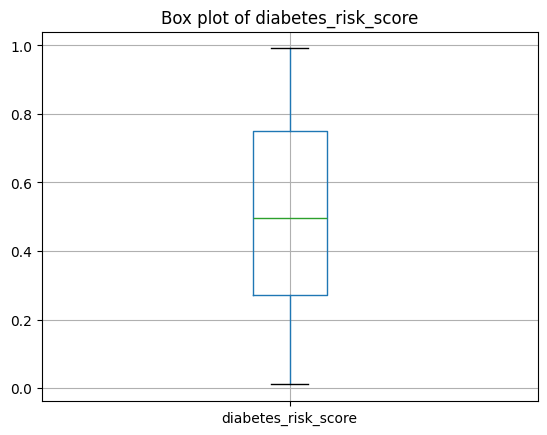

In [73]:
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Box plot of {col}")
    plt.show()

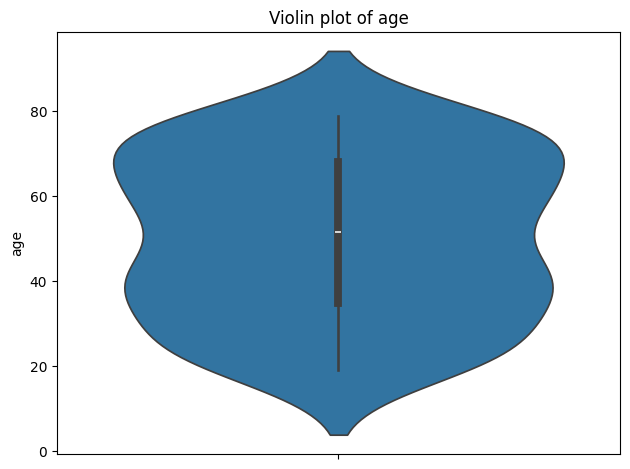

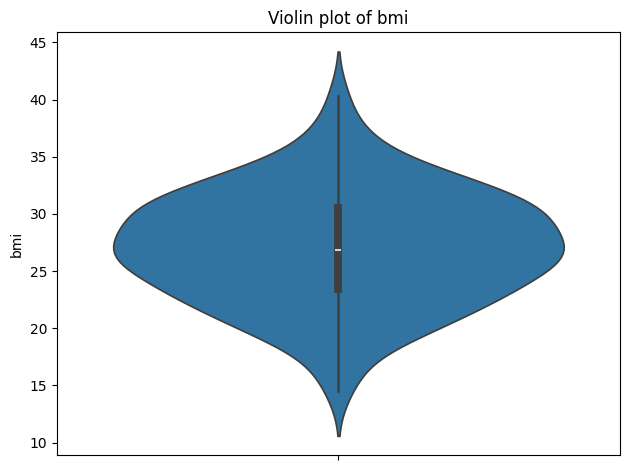

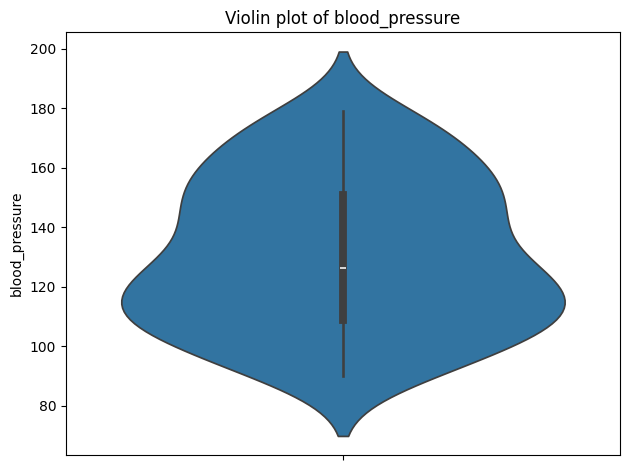

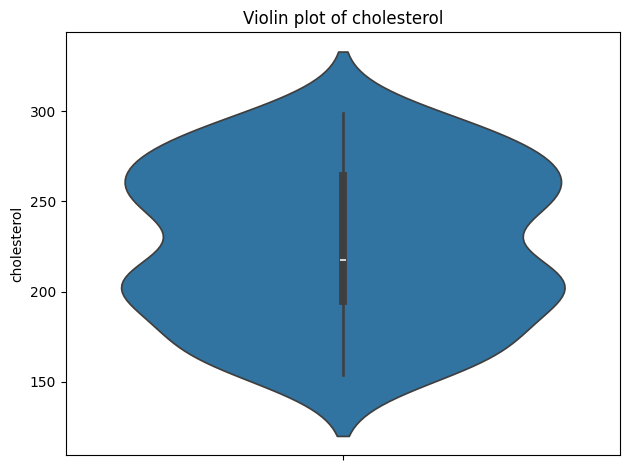

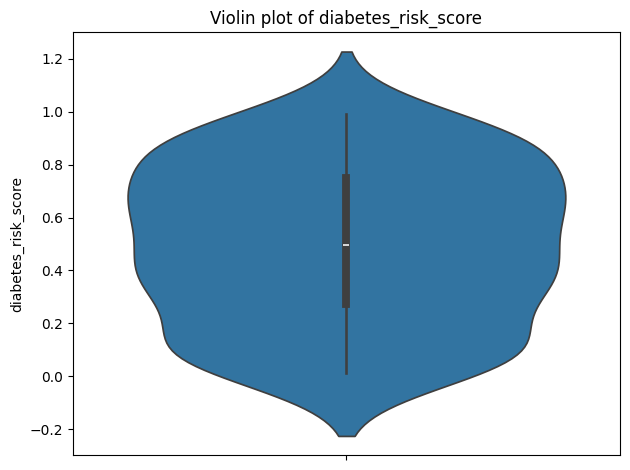

In [74]:

for col in numeric_cols:
    plt.figure()
    sns.violinplot(data=df, y=col)
    plt.title(f"Violin plot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [75]:
print("Non-missing values:\n", df.count())
print("\nMeans:\n", df.mean())
print("\nMedians:\n", df.median())
print("\nModes:\n", df.mode())

Non-missing values:
 age                    100
bmi                    100
blood_pressure         100
cholesterol            100
diabetes_risk_score    100
dtype: int64

Means:
 age                     50.27000
bmi                     27.10440
blood_pressure         130.83000
cholesterol            226.25000
diabetes_risk_score      0.49569
dtype: float64

Medians:
 age                     51.5000
bmi                     26.8750
blood_pressure         126.5000
cholesterol            217.5000
diabetes_risk_score      0.4975
dtype: float64

Modes:
     age    bmi  blood_pressure  cholesterol  diabetes_risk_score
0  61.0  29.30           122.0        207.0                0.071
1   NaN  30.49           137.0          NaN                0.282
2   NaN    NaN             NaN          NaN                0.319
3   NaN    NaN             NaN          NaN                0.751
4   NaN    NaN             NaN          NaN                0.905


In [76]:
# The exploratory analysis reveals that most of the numeric variables in this health dataset are not normally distributed and show evidence of right skew, particularly for BMI, blood pressure, and cholesterol.  Most values cluster in the lower to mid-range, with a smaller number of higher values extending the upper tail.  This is supported by the histograms and violin plots, which show concentrated density with elongated upper ranges.  The mean values are slightly higher than the medians for several variables, further suggesting skewness.  Some potential outliers are visible, especially in the higher ranges of cholesterol and blood pressure.  Overall, the dataset appears usable for exploratory analysis, though skewness and outliers should be considered in further modeling.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

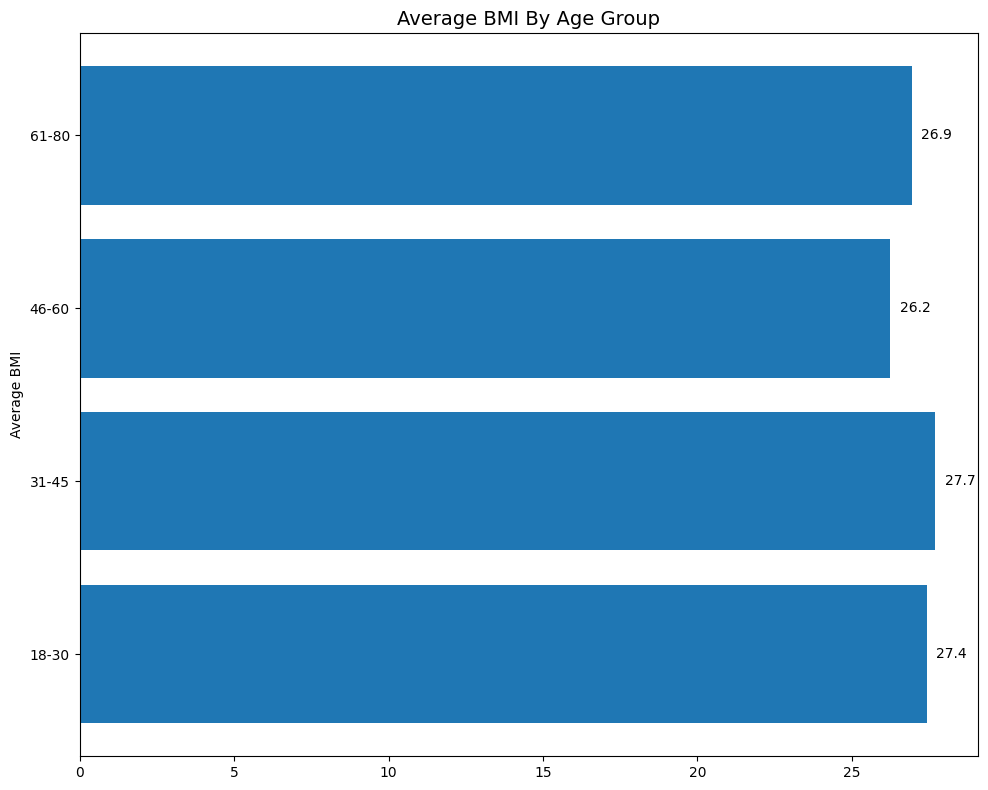

In [80]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[18, 30, 45, 60, 80],
    labels=["18-30", "31-45", "46-60", "61-80"])
grouped = df.groupby("age_group")["bmi"].mean().reset_index()            
plt.figure(figsize=(10,8))
plt.barh(grouped["age_group"], grouped["bmi"])
plt.title("Average BMI By Age Group", fontsize=14)
plt.ylabel("Average BMI")
for i, value in enumerate(grouped["bmi"]):
    plt.text(value + 0.3, i, round(value, 1), va="center")
plt.tight_layout()
plt.show()

In [ ]:
# I reproduced a horizontal bar chart using my health dataset.  The chart shows average BMI by age group, with sorted horizontal bars, minimal gridlines, removed top/right borders, and direct labels at the end of each bar to emphasize easy comparison and readability.